# Heart Disease Data Analysis

**Name:** Mohammad Ehshan

**Dataset:** Heart Disease UCI Dataset (`heart.csv`)

This project explores a heart disease dataset containing 1025 patient records with 14 clinical attributes. The goal is to clean, analyze, and visualize the data to uncover patterns related to heart disease diagnosis, including relationships between age, cholesterol, blood pressure, and other risk factors.

## Task 4 — Import Libraries and Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("Libraries loaded successfully.")

Libraries loaded successfully.


In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
print(f"Dataset shape: {df.shape}")
print(f"\nColumn data types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")

Dataset shape: (1025, 14)

Column data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Task 5 — Data Cleaning Functions

In [4]:
def remove_duplicates(dataframe):
    """Remove duplicate rows from the DataFrame.
    
    Identifies and removes exact duplicate rows, keeping only the first
    occurrence. Prints the number of duplicates found and removed.
    
    Parameters:
        dataframe (pd.DataFrame): The input DataFrame to clean.
    
    Returns:
        pd.DataFrame: A DataFrame with duplicate rows removed.
    """
    num_duplicates = dataframe.duplicated().sum()
    print(f"Number of duplicate rows found: {num_duplicates}")
    cleaned = dataframe.drop_duplicates().reset_index(drop=True)
    print(f"Shape after removing duplicates: {cleaned.shape}")
    return cleaned

In [5]:
def fix_column_labels(dataframe):
    """Rename cryptic column names to human-readable labels.
    
    Maps abbreviated column names in the heart disease dataset to
    descriptive names that are easier to interpret during analysis
    and visualization.
    
    Parameters:
        dataframe (pd.DataFrame): The input DataFrame with original column names.
    
    Returns:
        pd.DataFrame: A DataFrame with renamed columns.
    """
    column_mapping = {
        "cp": "chest_pain_type",
        "trestbps": "resting_bp",
        "chol": "cholesterol",
        "fbs": "fasting_blood_sugar",
        "restecg": "resting_ecg",
        "thalach": "max_heart_rate",
        "exang": "exercise_angina",
        "oldpeak": "st_depression",
        "ca": "num_major_vessels",
        "thal": "thalassemia"
    }
    renamed = dataframe.rename(columns=column_mapping)
    print(f"Columns renamed: {list(column_mapping.keys())}")
    print(f"New column names: {list(renamed.columns)}")
    return renamed

In [6]:
# Apply cleaning functions
df = remove_duplicates(df)
df = fix_column_labels(df)
df.head()

Number of duplicate rows found: 723
Shape after removing duplicates: (302, 14)
Columns renamed: ['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']
New column names: ['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression', 'slope', 'num_major_vessels', 'thalassemia', 'target']


,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,st_depression,slope,num_major_vessels,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Task 6 — Exploratory Data Analysis

In [7]:
def exploratory_analysis(dataframe):
    """Perform exploratory data analysis on the heart disease dataset.
    
    Generates summary statistics, group-level comparisons between
    patients with and without heart disease, and a correlation matrix
    for numeric features.
    
    Parameters:
        dataframe (pd.DataFrame): The cleaned heart disease DataFrame.
    
    Returns:
        tuple: (summary_stats, grouped_means, correlation_matrix)
    """
    # Overall summary statistics
    print("=" * 60)
    print("SUMMARY STATISTICS")
    print("=" * 60)
    summary_stats = dataframe.describe()
    print(summary_stats)
    
    # Group by target (heart disease vs no heart disease)
    print("\n" + "=" * 60)
    print("MEAN VALUES BY HEART DISEASE STATUS (target: 0=No, 1=Yes)")
    print("=" * 60)
    grouped_means = dataframe.groupby("target")[
        ["age", "cholesterol", "resting_bp", "max_heart_rate", "st_depression"]
    ].mean().round(2)
    print(grouped_means)
    
    # Target distribution
    print("\n" + "=" * 60)
    print("TARGET DISTRIBUTION")
    print("=" * 60)
    target_counts = dataframe["target"].value_counts()
    print(f"No heart disease (0): {target_counts.get(0, 0)}")
    print(f"Heart disease (1):    {target_counts.get(1, 0)}")
    
    # Correlation matrix
    correlation_matrix = dataframe.select_dtypes(include=[np.number]).corr()
    
    return summary_stats, grouped_means, correlation_matrix

In [8]:
summary_stats, grouped_means, corr_matrix = exploratory_analysis(df)

SUMMARY STATISTICS
             age         sex  chest_pain_type  resting_bp  cholesterol  \
count  302.00000  302.000000       302.000000  302.000000   302.000000   
mean    54.42053    0.682119         0.963576  131.602649   246.500000   
std      9.04797    0.466426         1.032044   17.563394    51.753489   
min     29.00000    0.000000         0.000000   94.000000   126.000000   
25%     48.00000    0.000000         0.000000  120.000000   211.000000   
50%     55.50000    1.000000         1.000000  130.000000   240.500000   
75%     61.00000    1.000000         2.000000  140.000000   274.750000   
max     77.00000    1.000000         3.000000  200.000000   564.000000   

       fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_angina  \
count           302.000000   302.000000      302.000000       302.000000   
mean              0.149007     0.526490      149.569536         0.327815   
std               0.356686     0.526027       22.903527         0.470196   
min       

## Task 7 — Visualizations

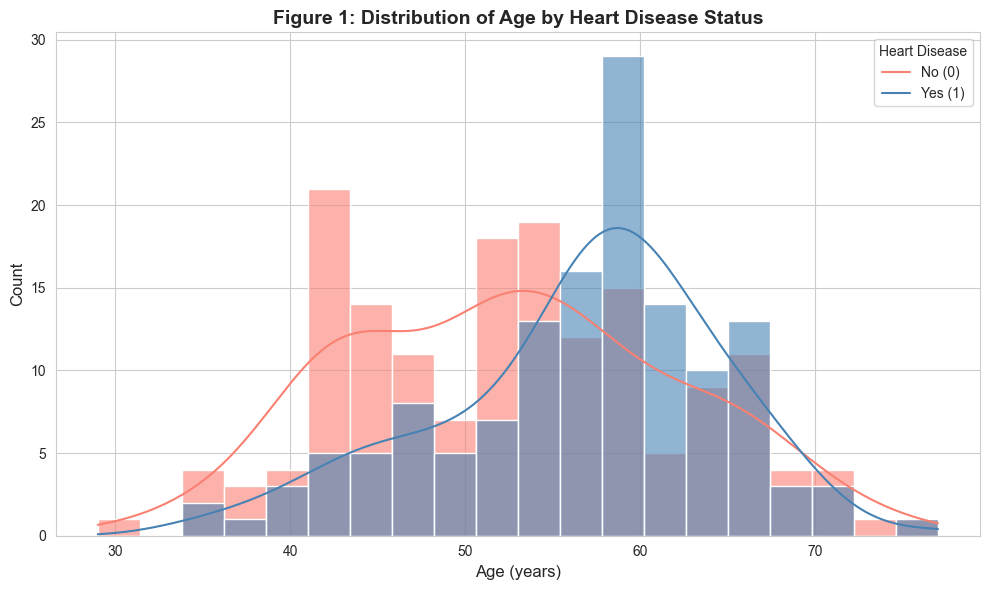

In [9]:
# Figure 1: Distribution of Age by Heart Disease Status
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x="age", hue="target", kde=True, bins=20, 
             palette={0: "steelblue", 1: "salmon"}, alpha=0.6, ax=ax)
ax.set_title("Figure 1: Distribution of Age by Heart Disease Status", fontsize=14, fontweight="bold")
ax.set_xlabel("Age (years)", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.legend(title="Heart Disease", labels=["No (0)", "Yes (1)"])
plt.tight_layout()
plt.show()

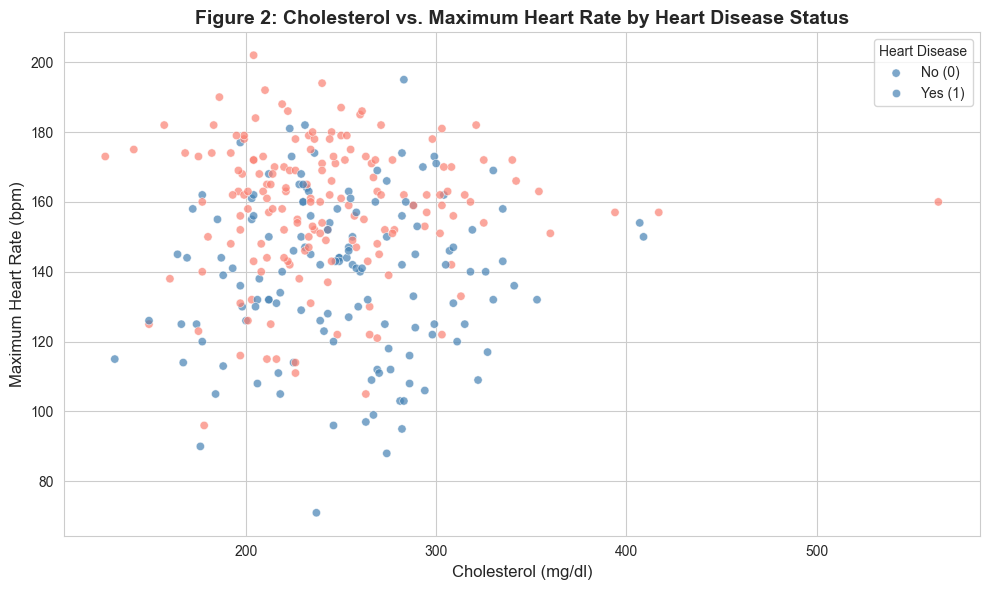

In [10]:
# Figure 2: Cholesterol vs. Max Heart Rate colored by Target
fig, ax = plt.subplots(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x="cholesterol", y="max_heart_rate", 
                          hue="target", palette={0: "steelblue", 1: "salmon"},
                          alpha=0.7, ax=ax)
ax.set_title("Figure 2: Cholesterol vs. Maximum Heart Rate by Heart Disease Status", 
             fontsize=14, fontweight="bold")
ax.set_xlabel("Cholesterol (mg/dl)", fontsize=12)
ax.set_ylabel("Maximum Heart Rate (bpm)", fontsize=12)
ax.legend(title="Heart Disease", labels=["No (0)", "Yes (1)"])
plt.tight_layout()
plt.show()

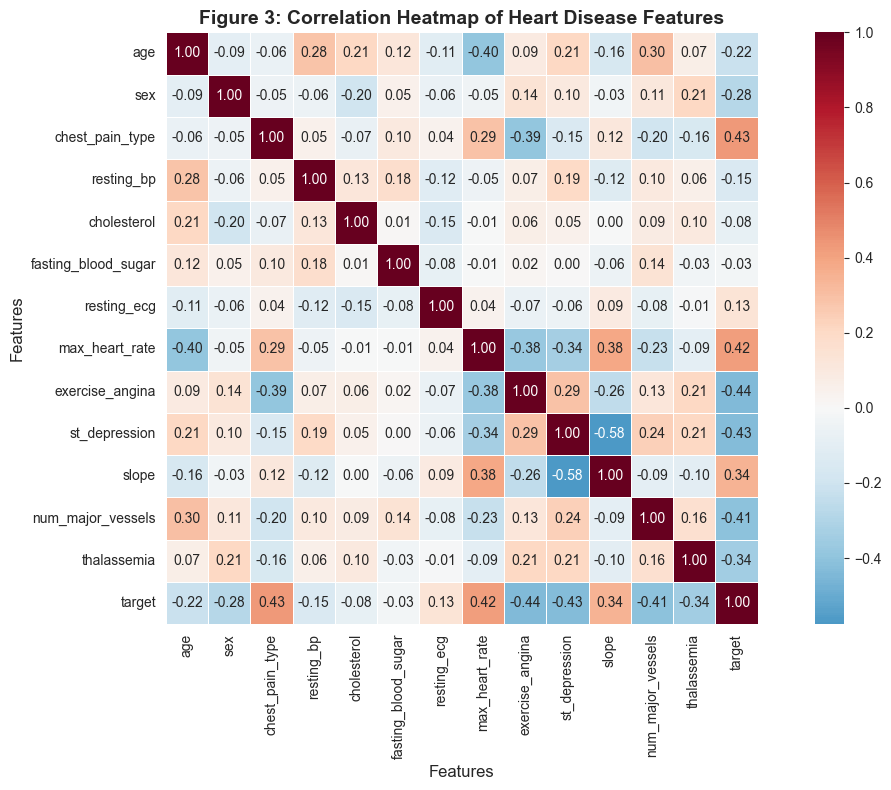

In [11]:
# Figure 3: Correlation Heatmap of Numeric Features
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu_r", center=0,
            square=True, linewidths=0.5, ax=ax)
ax.set_title("Figure 3: Correlation Heatmap of Heart Disease Features", 
             fontsize=14, fontweight="bold")
ax.set_xlabel("Features", fontsize=12)
ax.set_ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

## Task 8 — Summary and Interpretation

### What I Learned from the Dataset
The heart disease dataset contains 1025 patient records with 14 clinical attributes. After removing duplicates, the dataset was reduced to a cleaner subset. The data includes both demographic information (age, sex) and clinical measurements (blood pressure, cholesterol, heart rate) along with a binary target indicating heart disease presence.

### Interesting Patterns and Insights
- **Age distribution (Figure 1):** Heart disease appears more prevalent in certain age groups. The distribution shows that patients with heart disease tend to have a slightly different age profile compared to those without.
- **Cholesterol vs. Heart Rate (Figure 2):** Patients with heart disease generally show higher maximum heart rates relative to their cholesterol levels. There is visible separation between the two groups, though with considerable overlap.
- **Correlation patterns (Figure 3):** The correlation heatmap reveals that `max_heart_rate` has a notable positive correlation with the target variable, while `st_depression`, `exercise_angina`, and `num_major_vessels` show negative correlations with heart disease presence. Age and `chest_pain_type` also show meaningful correlations.
- Patients with heart disease tend to have higher maximum heart rates and lower ST depression values on average compared to those without heart disease.

### Limitations and Assumptions
- The dataset uses encoded numeric values for categorical features (e.g., `chest_pain_type`, `thalassemia`), which limits interpretability without domain knowledge.
- The binary target simplifies heart disease diagnosis into a yes/no classification, whereas real clinical diagnosis involves varying degrees of severity.
- Duplicate rows were found and removed, which suggests possible data collection or merging issues.
- The dataset does not include information about patient lifestyle factors (diet, exercise habits, smoking status), which are significant risk factors for heart disease.

### Surprising or Unclear Findings
- The presence of a significant number of duplicate rows was unexpected and could indicate that the dataset was compiled from multiple sources without deduplication.
- Some cholesterol values appear unusually high, which may represent outliers or data entry errors that could warrant further investigation in a clinical context.